In [1]:
# importanto as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from seaborn import load_dataset

%matplotlib inline

In [21]:
def ajuste(df, ajuste: str, nome_reg, x: str) -> None:


    nome_reg = smf.ols(ajuste, data=df).fit()
    print(nome_reg.summary())

    df[nome_reg] = nome_reg.resid
    
    y = df[nome_reg]
    sns.scatterplot(data=df, x=x, y=y)
    
    return None

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
# carrega a base de dados

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        20:26:38   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.62e-13
Time:                        20:50:06   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

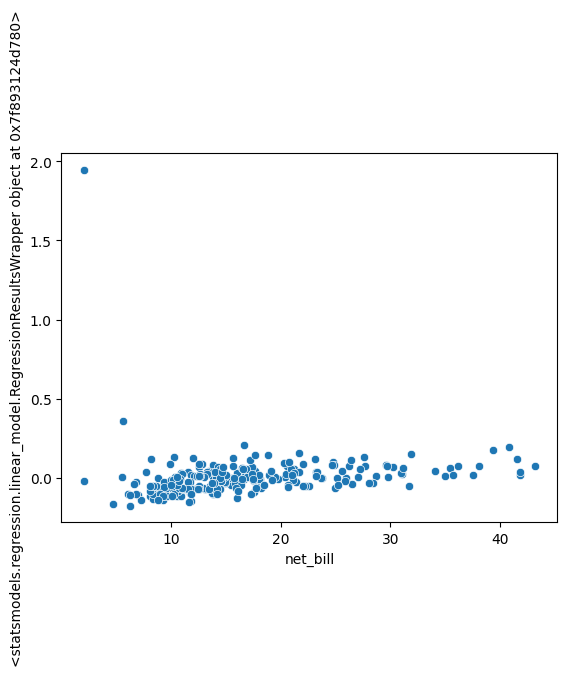

In [26]:
ajuste(tips, 'tip_pct ~ np.log(net_bill)', reg_log, x='net_bill')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.06e-09
Time:                        20:43:40   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

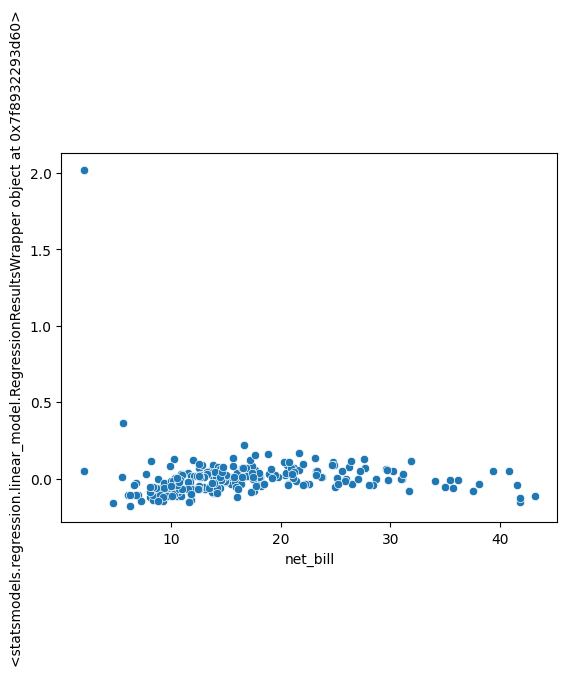

In [22]:
ajuste(tips, 'tip_pct ~ net_bill + np.power(net_bill,2)', reg_seg_grau, x='net_bill')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.27e-16
Time:                        20:47:11   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

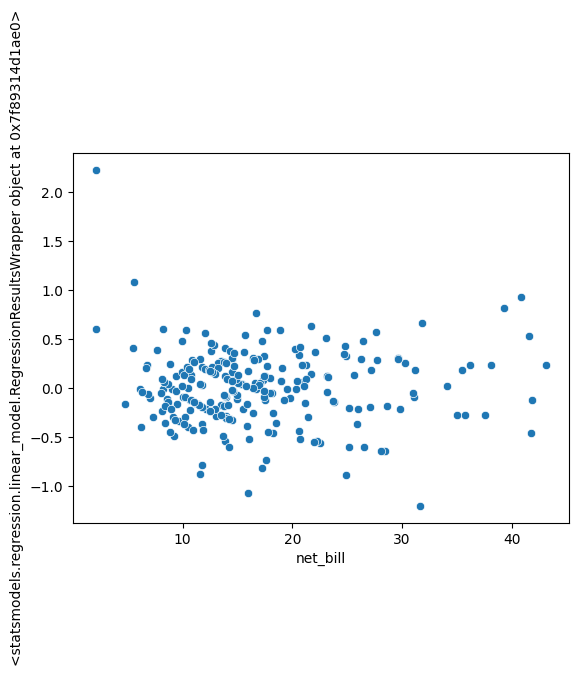

In [24]:
ajuste(tips, 'np.log(tip_pct) ~ net_bill', nome_reg='reg_log_tip_pct', x='net_bill')

In [36]:
# calculando R² para tip_pct

tips['log_tip_pct_pred'] = np.exp(reg_log_tip_pct.fittedvalues)

# calculando o R²
r_2 = tips[['log_tip_pct_pred', 'tip_pct']].corr().iloc[0,1]**2

print(f'R² = {round(r_2,2)}')

R² = 0.11


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           5.20e-20
Time:                        21:05:06   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

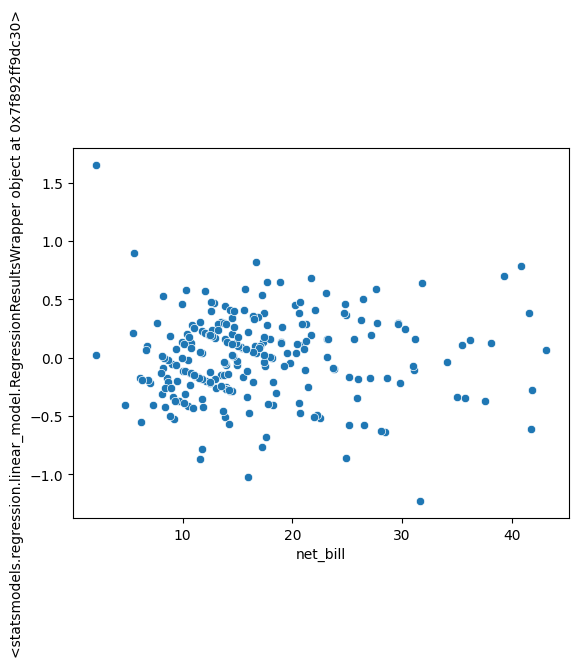

In [45]:
ajuste(tips, 'np.log(tip_pct) ~ np.log(net_bill)', nome_reg='reg_logs', x='net_bill')

In [44]:
# calculando R² para tip_pct

tips['reg_logs_pred'] = np.exp(reg_logs.fittedvalues)

# calculando o R²
r_2 = tips[['reg_logs_pred', 'tip_pct']].corr().iloc[0,1]**2

print(f'R² = {round(r_2,2)}')

NameError: name 'reg_logs' is not defined

###  6. qual modelo resultou no melhor ajuste?

O modelo que utiliza do log(tip_pct) e log(net_bill). Pois o padrão esperado dos resíduos está mais distribuído.